# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston=pd.read_csv('../data/boston_data.csv') 

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [5]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [6]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [7]:
#remove outliers

from scipy import stats
#compute z scores 
z_scores = stats.zscore(boston)
#get absolute values
abs_z_scores = np.abs(z_scores)

#keep rows where all the absolute Z scores are below 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

new_boston = boston[filtered_entries]
new_boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
397,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
398,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1


### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

In [8]:
import seaborn as sns

#sns.pairplot(df, y_vars=s=df.columns)

In [9]:
#https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
# to learn about the variables

In [10]:
#rm and age vs medv
#data dispersion and regression line

In [11]:
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

SyntaxError: invalid syntax (<ipython-input-11-635505732c36>, line 1)

In [12]:
 slope, intercept, r_value, p_value, std_err = stats.linregress(boston.rm, boston.medv)
(r_value)**2

0.46722829037763675

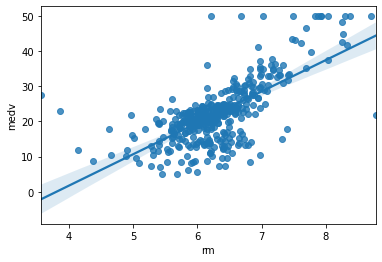

In [13]:
ax = sns.regplot(x="rm", y="medv", data=boston)

In [14]:
 slope, intercept, r_value, p_value, std_err = stats.linregress(boston.tax, boston.medv)
(r_value)**2

0.24581011055826915

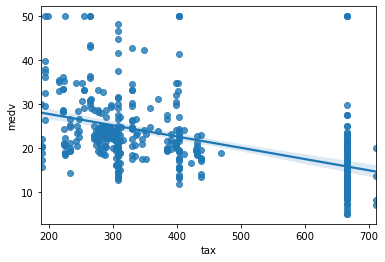

In [15]:
ax = sns.regplot(x="tax", y="medv", data=boston)

In [16]:
 slope, intercept, r_value, p_value, std_err = stats.linregress(boston.age, boston.medv)
(r_value)**2

0.15277415953283174

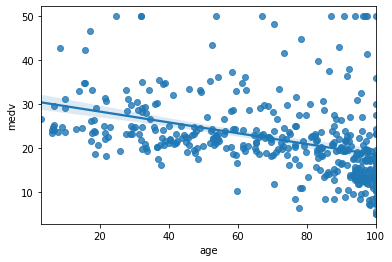

In [17]:
ax = sns.regplot(x="age", y="medv", data=boston)

In [18]:
 slope, intercept, r_value, p_value, std_err = stats.linregress(boston.black, boston.medv)
(r_value)**2

0.1296511912146812

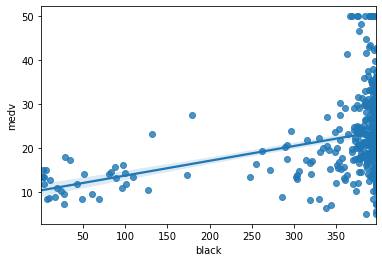

In [19]:

ax = sns.regplot(x="black", y="medv", data=boston)

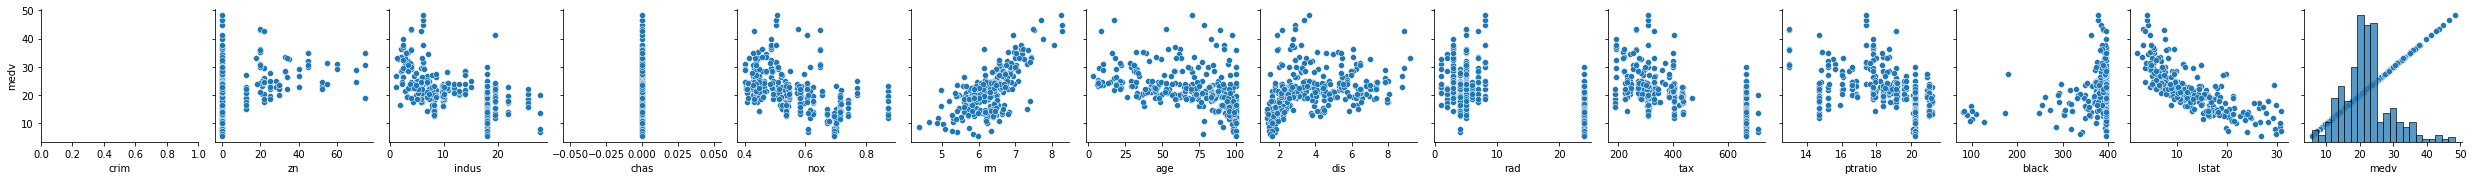

In [20]:

sns.pairplot(data=new_boston,  y_vars="medv", x_vars=new_boston.columns)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [21]:
#The variables most correlated with the price, seem to the rm (average number of rooms per dwelling), and lstat (% lower status of the population )

In [22]:
#It is reasonable that number of rooms is the most correlated

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

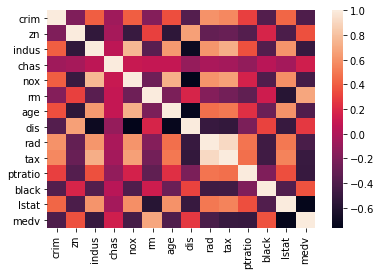

In [23]:
#with outliers
corr = boston.corr()
ax = sns.heatmap(corr)

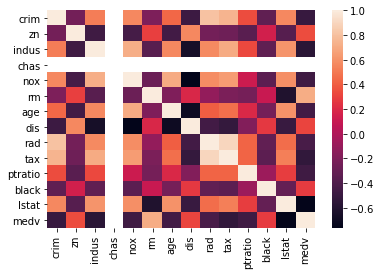

In [24]:
#without outliers
corr = new_boston.corr()
ax = sns.heatmap(corr)

In [25]:
#The most correlated variables with medv, besides rm and lstat,
#are indus (proportion of non-retail business acres per town.), and tax ( full-value property-tax rate per $10,000)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [26]:
new_boston.medv.describe()

count    321.000000
mean      21.783489
std        7.122202
min        5.600000
25%       17.800000
50%       21.200000
75%       24.600000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [27]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    return (r2_score(y_true, y_predict))
    

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [28]:
y=new_boston.medv
X=new_boston.drop(columns="medv")

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [35]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

In [36]:
#RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [37]:
#reg_models=[2,4,6,8,10]
#for i in reg_models:
#    "RFR_%"%i=RandomForestRegressor(max_depth=i)


In [38]:
reg_models=[2,4,6,8,10]

RFR_2=RandomForestRegressor(max_depth=2)
RFR_4=RandomForestRegressor(max_depth=4)
RFR_6=RandomForestRegressor(max_depth=6)
RFR_8=RandomForestRegressor(max_depth=8)
RFR_10=RandomForestRegressor(max_depth=10)


In [39]:
list_1=[RFR_2, RFR_4, RFR_6, RFR_8, RFR_10]
for i in list_1:
    i.fit (X_train, y_train)

In [48]:
for i in list_1:
    print(i,"train_score: ",i.score(X_train, y_train))
    print(i, "test_scrore: ",i.score(X_test, y_test))

RandomForestRegressor(max_depth=2) train_score:  0.7792747507038478
RandomForestRegressor(max_depth=2) test_scrore:  0.7203219461740046
RandomForestRegressor(max_depth=4) train_score:  0.8985392018044864
RandomForestRegressor(max_depth=4) test_scrore:  0.8119844266184835
RandomForestRegressor(max_depth=6) train_score:  0.9496214471426149
RandomForestRegressor(max_depth=6) test_scrore:  0.8293712075177075
RandomForestRegressor(max_depth=8) train_score:  0.9678159111495083
RandomForestRegressor(max_depth=8) test_scrore:  0.8347695440629669
RandomForestRegressor(max_depth=10) train_score:  0.9727740882783853
RandomForestRegressor(max_depth=10) test_scrore:  0.8336634935274018


In [47]:
train_scores=[]
test_scores=[]

for i in list_1:
    train_scores.append(i.score(X_train, y_train))
    test_scores.append(i.score(X_test, y_test))

Now, plot the score for each tree on the training set and on the testing set.

What do these results tell you about the effect of the depth of the trees on the performance of the model?

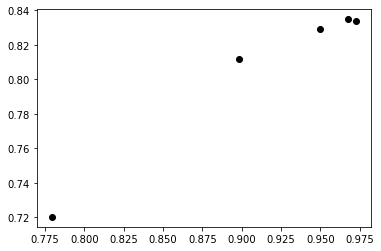

In [56]:
plt.plot(train_scores, test_scores, 'o', color='black');

In [ ]:
# After max depth equal 6,
#the performance on the test set performance is not improving as much as the performance on the train set.
#with depth equal to 10, test set is doing it worse than test set with 8.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
#With a max depth of 1 it suffers from high bias, it is a very simple model
#with 10, we have a model with high variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [62]:
RFR_2=RandomForestRegressor(max_depth=2)
RFR_3=RandomForestRegressor(max_depth=3)
RFR_4=RandomForestRegressor(max_depth=4)
RFR_5=RandomForestRegressor(max_depth=5)
RFR_6=RandomForestRegressor(max_depth=6)
RFR_7=RandomForestRegressor(max_depth=7)

In [63]:
list_1=[RFR_2, RFR_3, RFR_4, RFR_5, RFR_6, RFR_7]
train_scores=[]
test_scores=[]

for i in list_1:
    i.fit (X_train, y_train)
    train_scores.append(i.score(X_train, y_train))
    test_scores.append(i.score(X_test, y_test))
    print(i,"train_score: ",i.score(X_train, y_train))
    print(i, "test_scrore: ",i.score(X_test, y_test))

RandomForestRegressor(max_depth=2) train_score:  0.7799776383589
RandomForestRegressor(max_depth=2) test_scrore:  0.7407501080430907
RandomForestRegressor(max_depth=3) train_score:  0.8549191388055002
RandomForestRegressor(max_depth=3) test_scrore:  0.7845095329941969
RandomForestRegressor(max_depth=4) train_score:  0.9015295530780981
RandomForestRegressor(max_depth=4) test_scrore:  0.8097865130362438
RandomForestRegressor(max_depth=5) train_score:  0.9320796705669959
RandomForestRegressor(max_depth=5) test_scrore:  0.8184213826385225
RandomForestRegressor(max_depth=6) train_score:  0.9499743017196076
RandomForestRegressor(max_depth=6) test_scrore:  0.8316122966629945
RandomForestRegressor(max_depth=7) train_score:  0.9620201787079938
RandomForestRegressor(max_depth=7) test_scrore:  0.8246519980518853


In [ ]:
# I would use a model with max depth equal to 6, which has the highest performance in the test.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
#it should not be used, as population has change tremendously.
#the only features describing the homes is the number of rooms,
#the rest are describing the location as it was 50 years ago.
#there model could be used to make "predictions" of the market at the time the data was collected.
#the predictions would only be relevant to the time and location the data set was collected.
